# attack using CNN treating the graphs as flattened images of some time-span

In [30]:
import numpy as np
import matplotlib.pyplot as plt

In [31]:
# Shape of train, val and test should be (nr_samples, 23, 256)
# Every sample of data represents 1 second taken from 23 channels with 256-bit rate

npz_file_train = np.load('./media/eeg-predictive_train.npz', allow_pickle=True)
npz_file_val = np.load('./media/eeg-predictive_val.npz', allow_pickle=True)
npz_file_val_balanced = np.load('./media/eeg-predictive_val_balanced.npz', allow_pickle=True)

In [32]:
signals_train = npz_file_train['train_signals']
labels_train = npz_file_train['train_labels']

signals_val = npz_file_val['val_signals']
labels_val = npz_file_val['val_labels']

signals_val_balanced = npz_file_val_balanced['val_signals']
labels_val_balanced = npz_file_val_balanced['val_labels']

print('Train data shape is {}'.format(signals_train.shape))
print('Trains Labels shape for train is {}'.format(labels_train.shape))
print()
print('Val data shape is {}'.format(signals_val.shape))
print('Val Labels shape for train is {}'.format(labels_val.shape))
print()
print('Val_bal data shape is {}'.format(signals_val_balanced.shape))
print('Val_bal Labels shape for train is {}'.format(labels_val_balanced.shape))
print(npz_file_train.files)

Train data shape is (8282, 23, 256)
Trains Labels shape for train is (8282,)

Val data shape is (1462, 23, 256)
Val Labels shape for train is (1462,)

Val_bal data shape is (656, 23, 256)
Val_bal Labels shape for train is (656,)
['train_signals', 'train_labels']


In [33]:
signals_train = signals_train.reshape(-1, 23, 256, 1)
signals_val = signals_val.reshape(-1, 23, 256, 1)
signals_val_balanced = signals_val_balanced.reshape(-1, 23, 256, 1)

In [34]:
max_eeg = max(signals_train.max(), signals_val.max())
min_egg = min(signals_train.min(), signals_val.min())

max_eeg, min_egg

(2760.6349206349205, -2632.967032967033)

In [35]:
#signals_train = (signals_train - min_egg) / (max_eeg - min_egg)
#signals_val = (signals_val - min_egg) / (max_eeg - min_egg)
#signals_val_balanced = (signals_val_balanced - min_egg) / (max_eeg - min_egg)

signals_train

array([[[[-2.12942613e+01],
         [-2.01221001e+01],
         [-3.14529915e+01],
         ...,
         [-6.85714286e+01],
         [-5.60683761e+01],
         [-4.27838828e+01]],

        [[ 7.48229548e+01],
         [ 1.26984127e+01],
         [ 9.76800977e-01],
         ...,
         [-7.32600733e+01],
         [-5.09890110e+01],
         [-5.52869353e+01]],

        [[-5.91941392e+01],
         [-4.88400488e+00],
         [ 5.27472527e+00],
         ...,
         [-6.44688645e+00],
         [-3.49694750e+01],
         [-1.73870574e+01]],

        ...,

        [[ 1.23076923e+01],
         [ 1.11355311e+01],
         [ 8.40048840e+00],
         ...,
         [-1.42612943e+01],
         [-1.77777778e+01],
         [-1.19169719e+01]],

        [[ 3.10622711e+01],
         [ 2.71550672e+01],
         [ 8.40048840e+00],
         ...,
         [ 2.63736264e+01],
         [ 3.88766789e+01],
         [ 3.61416361e+01]],

        [[-2.67643468e+01],
         [-3.06715507e+01],
         [

In [36]:
labels_train[:100]

array([1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0.,
       0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

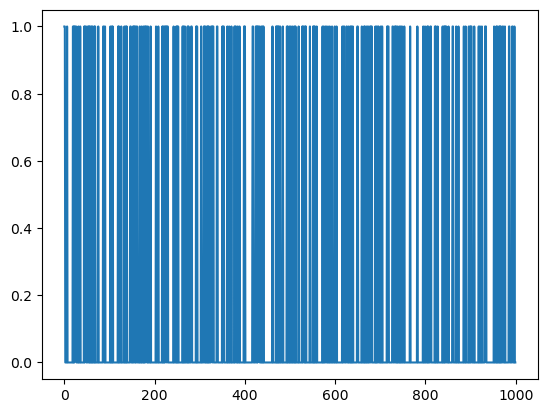

In [37]:
plt.plot(labels_train[:1000])
plt.show()

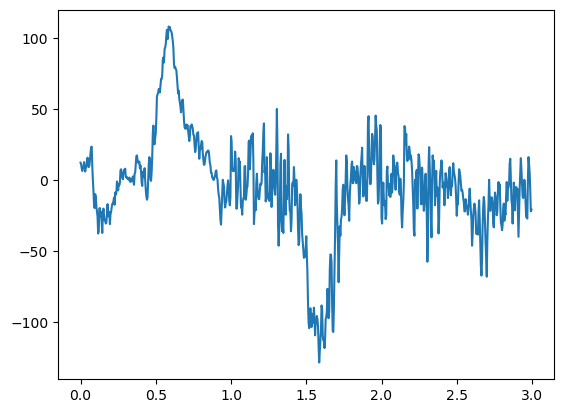

In [38]:
plt.plot(np.arange(0, 3, 1/256), signals_train[0, 20:25].flatten())
plt.show()

# Model construction

In [39]:
signals_train.shape, signals_val.shape

((8282, 23, 256, 1), (1462, 23, 256, 1))

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    MaxPool2D,
    Flatten,
    Dropout,
    BatchNormalization,
)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

model = Sequential()
model.add(Conv2D(75, (3, 3), strides=1, padding="same", activation="relu",
                 input_shape=(23, 256, 1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(50, (3, 3), strides=1, padding="same", activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(25, (3, 3), strides=1, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Flatten())
model.add(Dense(units=512, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=1, activation="sigmoid"))

In [41]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 23, 256, 75)       750       
                                                                 
 batch_normalization_6 (Batc  (None, 23, 256, 75)      300       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 12, 128, 75)      0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 12, 128, 50)       33800     
                                                                 
 dropout_4 (Dropout)         (None, 12, 128, 50)       0         
                                                                 
 batch_normalization_7 (Batc  (None, 12, 128, 50)     

# Data augmentation

In [42]:
datagen = ImageDataGenerator(
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=0.1,  # Randomly zoom image
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images horizontally
    vertical_flip=False, # Don't randomly flip images vertically, doesn't make sense in EEG's
)

In [43]:
datagen.fit(signals_train)

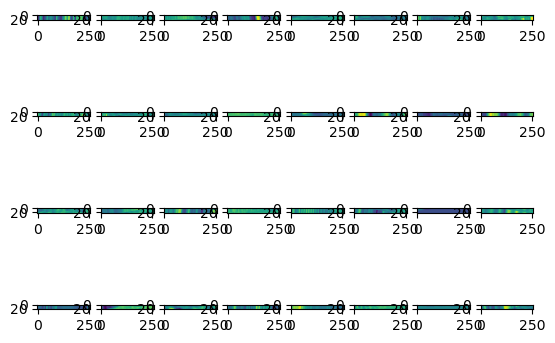

In [44]:
import matplotlib.pyplot as plt
import numpy as np
batch_size = 32
img_iter = datagen.flow(signals_train,labels_train, batch_size=batch_size)

x, y = img_iter.next()
fig, ax = plt.subplots(nrows=4, ncols=8)
for i in range(batch_size):
    image = x[i]
    ax.flatten()[i].imshow(np.squeeze(image))
plt.show()

# Fitting

In [45]:
model.compile(loss="binary_crossentropy", metrics=["accuracy"])

In [47]:
model.fit(signals_train, labels_train, steps_per_epoch=len(signals_train)/batch_size, epochs=20, verbose=1, validation_data=(signals_val, labels_val))

Epoch 1/20
258/258 [==============================] - 21s 79ms/step - loss: 0.1710 - accuracy: 0.9362 - val_loss: 0.8605 - val_accuracy: 0.6833
Epoch 2/20
258/258 [==============================] - 19s 75ms/step - loss: 0.1455 - accuracy: 0.9476 - val_loss: 0.8585 - val_accuracy: 0.7107
Epoch 3/20
258/258 [==============================] - 19s 73ms/step - loss: 0.1282 - accuracy: 0.9563 - val_loss: 0.7957 - val_accuracy: 0.7244
Epoch 4/20
258/258 [==============================] - 19s 74ms/step - loss: 0.1003 - accuracy: 0.9649 - val_loss: 0.9272 - val_accuracy: 0.7695
Epoch 5/20
258/258 [==============================] - 20s 76ms/step - loss: 0.0854 - accuracy: 0.9703 - val_loss: 0.9158 - val_accuracy: 0.7373
Epoch 6/20
258/258 [==============================] - 20s 77ms/step - loss: 0.0768 - accuracy: 0.9749 - val_loss: 0.9211 - val_accuracy: 0.7250
Epoch 7/20
258/258 [==============================] - 20s 79ms/step - loss: 0.0706 - accuracy: 0.9769 - val_loss: 1.0366 - val_accuracy:

In [49]:
model.predict(signals_val)

2024-04-21 23:29:22.849802: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


46/46 [==============================] - 2s 26ms/step


array([[2.4048472e-13],
       [3.8904976e-02],
       [1.4239898e-14],
       ...,
       [2.5574490e-04],
       [5.7909137e-08],
       [1.1659608e-07]], dtype=float32)